# True or False, Switzerland is in the EU?

For the following statements about the EU please tell me whether you think it is true or false: Switzerland is a Member State of the EU? 

This is a question on the 2018 Eurobarometer. Lets check how many people think it is true.

In [3]:
import pandas as pd
import country_converter as coco

In [6]:
cols2skip = [0]
cols = [i for i in range(100) if i not in cols2skip]

df_raw = pd.read_excel('./data/eb_90_volume_A.xls', sheet_name="QA14.3", skiprows=8, usecols=cols)
df_raw.rename(columns={'UE28\nEU28':'EU28', 'UE28-UK\nEU28-UK':'EU28-UK' }, inplace=True)
df = df_raw.transpose()
df = df.rename(columns=df.iloc[0])
df = df.iloc[1:]

names = df.index.tolist()
names = ['GR' if (x == 'EL') else x for x in names]
names = ['GB' if (x == 'UK') else x for x in names]
iso3 = coco.convert(names=names, to='ISO3', not_found=None)

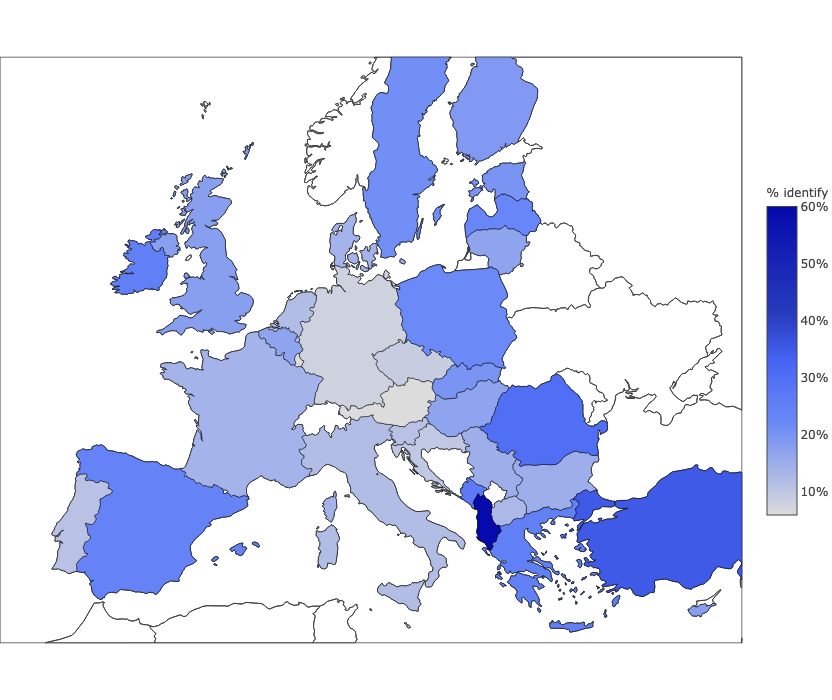

In [8]:
%run plot.ipynb
make_plot(locations=iso3, z=df['True'] * 100)